# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

19:03:52 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=62954;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=425309;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=670204;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=936683;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

19:03:53 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=387722;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=864560;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

19:03:54 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=315511;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=886811;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

19:03:55 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=383410;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=850590;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

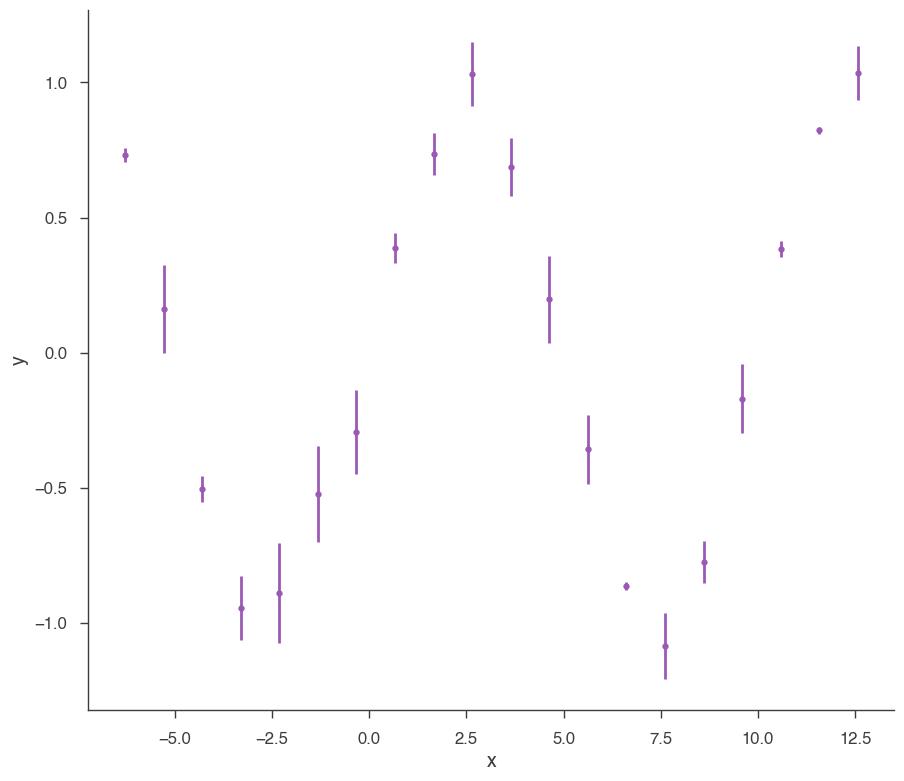

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=13046;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=457740;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19:03:58 INFO      Mean acceptance fraction: 0.7077                                            ]8;id=29846;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=734575;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

19:03:59 INFO      fit restored to maximum of posterior                                         ]8;id=80838;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=331315;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=653376;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=459086;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.019 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.992 -0.033 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.098938
total,-6.098938


Values of statistical measures:

,statistical measures
AIC,16.903757
BIC,18.189340
DIC,16.252257
PDIC,2.015493


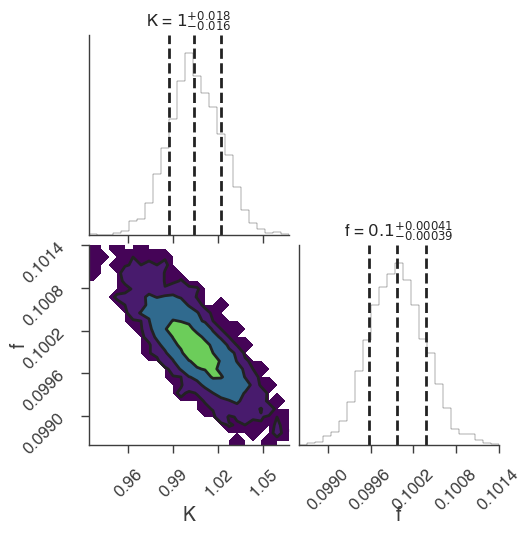

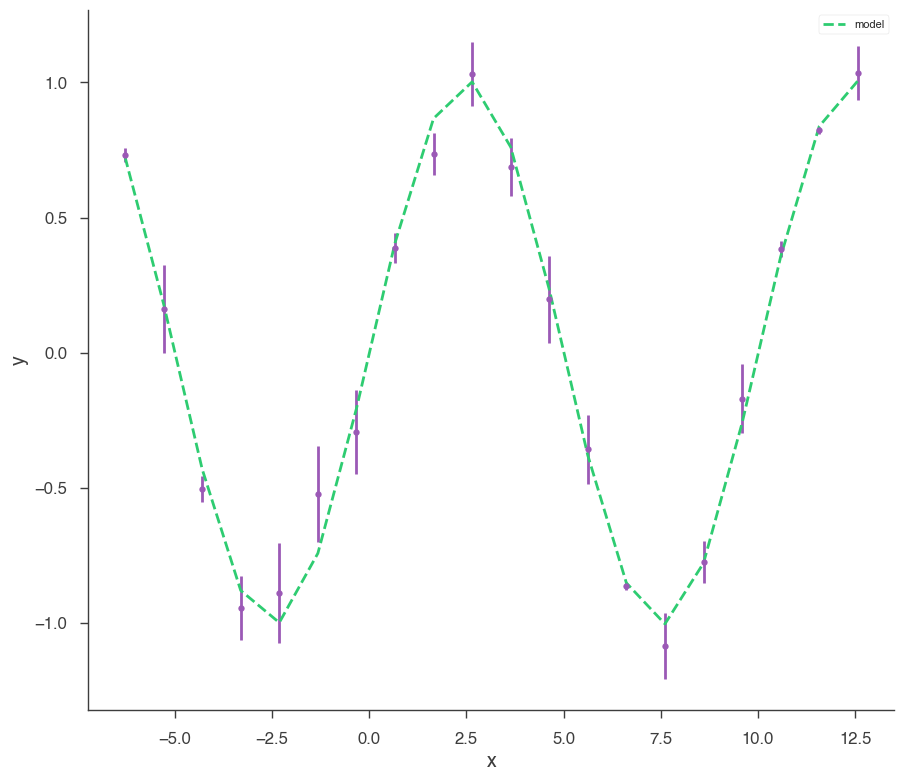

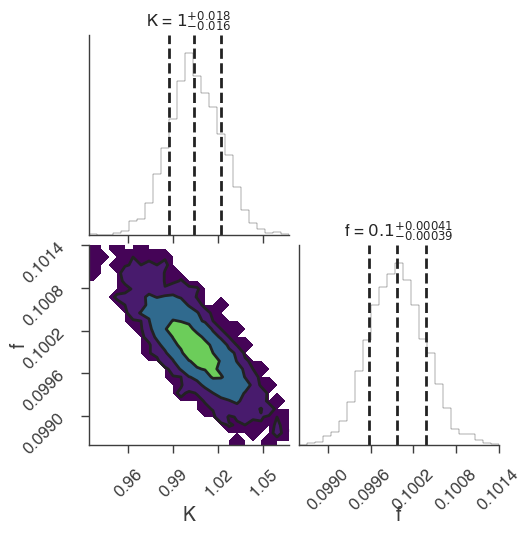

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=437337;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=810567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -16.080548709499833      +/-  0.14987492912514530     
 Total Likelihood Evaluations:         5620
 Sampling finished. Exiting MultiNest



19:04:00 INFO      fit restored to maximum of posterior                                         ]8;id=573881;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=62671;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=827502;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=131386;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.007 -0.017 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 -0.035 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.099175
total,-6.099175


Values of statistical measures:

,statistical measures
AIC,16.904233
BIC,18.189815
DIC,15.903567
PDIC,1.852777
log(Z),-6.983694


         INFO      deleting the chain directory chains                                     ]8;id=570026;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=789443;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

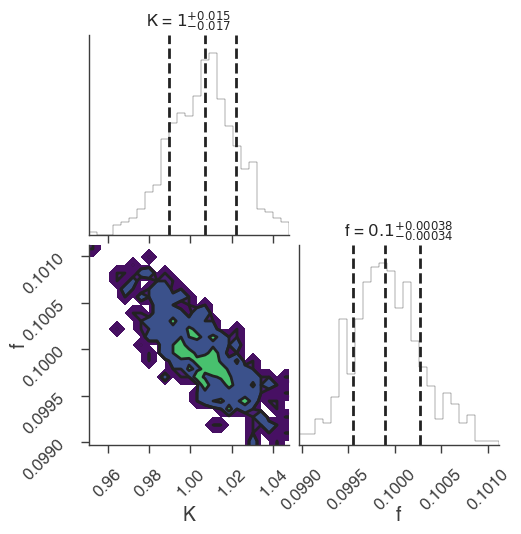

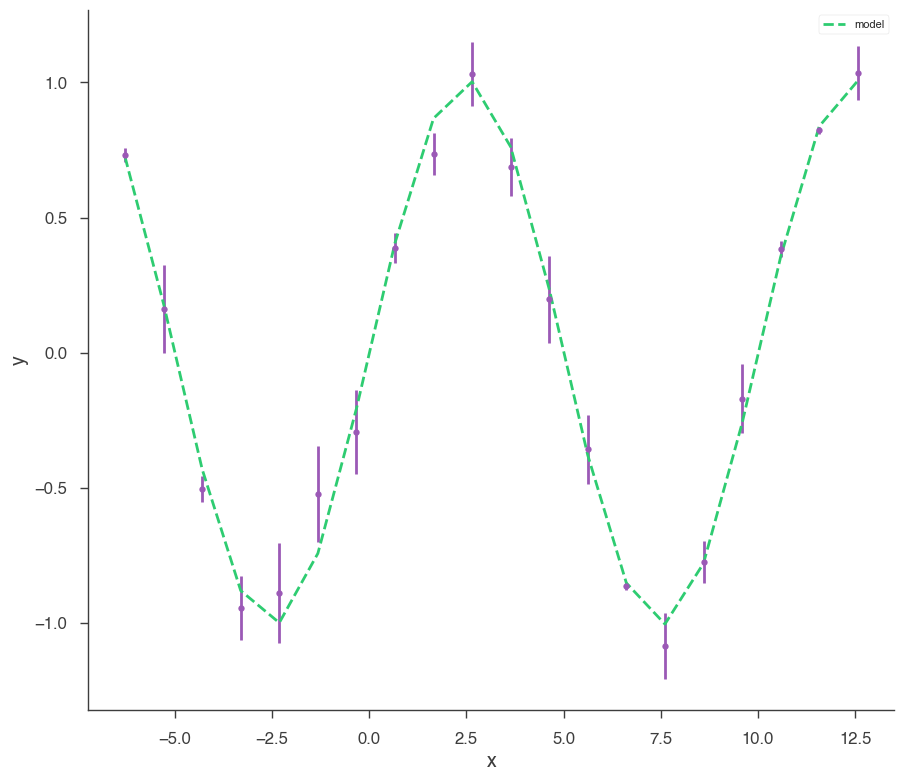

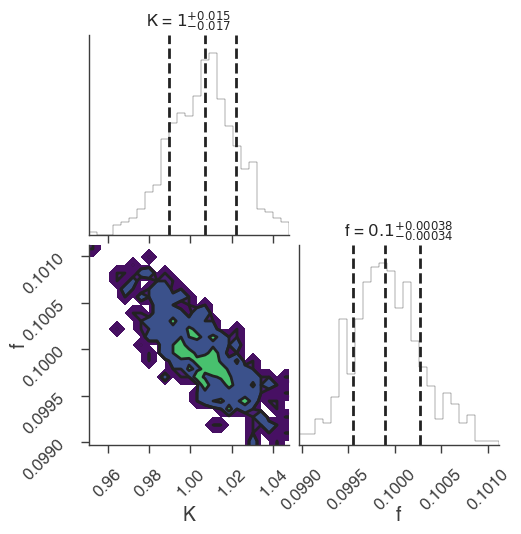

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

19:04:01 INFO      sampler set to dynesty_nested                                           ]8;id=732825;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=565115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

234it [00:00, 2338.20it/s, bound: 0 | nc: 1 | ncall: 734 | eff(%): 31.880 | loglstar:   -inf < -7967.440 <    inf | logz: -7974.709 +/-  0.135 | dlogz: 7966.570 >  0.409]

468it [00:00, 1827.40it/s, bound: 0 | nc: 3 | ncall: 1370 | eff(%): 34.161 | loglstar:   -inf < -4656.814 <    inf | logz: -4664.661 +/-  0.140 | dlogz: 4649.836 >  0.409]

658it [00:00, 1379.39it/s, bound: 0 | nc: 6 | ncall: 2212 | eff(%): 29.747 | loglstar:   -inf < -2854.730 <    inf | logz: -2862.504 +/-  0.132 | dlogz: 2843.194 >  0.409]

808it [00:00, 1156.64it/s, bound: 0 | nc: 3 | ncall: 3333 | eff(%): 24.242 | loglstar:   -inf < -2053.705 <    inf | logz: -2062.280 +/-  0.144 | dlogz: 2044.168 >  0.409]

933it [00:00, 1032.71it/s, bound: 0 | nc: 3 | ncall: 4464 | eff(%): 20.901 | loglstar:   -inf < -1522.778 <    inf | logz: -1530.725 +/-  0.140 | dlogz: 1510.585 >  0.409]

1042it [00:00, 898.71it/s, bound: 0 | nc: 3 | ncall: 5872 | eff(%): 17.745 | loglstar:   -inf < -1229.392 <    inf | logz: -1236.754 +/-  0.132 | dlogz: 1223.759 >  0.409]

1136it [00:01, 717.05it/s, bound: 0 | nc: 31 | ncall: 7315 | eff(%): 15.530 | loglstar:   -inf < -1051.184 <    inf | logz: -1060.687 +/-  0.153 | dlogz: 1051.429 >  0.409]

1214it [00:01, 639.16it/s, bound: 0 | nc: 58 | ncall: 8790 | eff(%): 13.811 | loglstar:   -inf < -930.671 <    inf | logz: -939.947 +/-  0.145 | dlogz: 927.455 >  0.409]   

1282it [00:01, 553.65it/s, bound: 0 | nc: 22 | ncall: 10156 | eff(%): 12.623 | loglstar:   -inf < -770.284 <    inf | logz: -780.090 +/-  0.154 | dlogz: 769.316 >  0.409]

1340it [00:01, 434.91it/s, bound: 0 | nc: 24 | ncall: 11951 | eff(%): 11.212 | loglstar:   -inf < -673.352 <    inf | logz: -683.163 +/-  0.151 | dlogz: 671.000 >  0.409]

1388it [00:01, 423.28it/s, bound: 0 | nc: 8 | ncall: 13082 | eff(%): 10.610 | loglstar:   -inf < -579.773 <    inf | logz: -588.913 +/-  0.145 | dlogz: 576.748 >  0.409] 

1433it [00:02, 363.45it/s, bound: 0 | nc: 10 | ncall: 14294 | eff(%): 10.025 | loglstar:   -inf < -504.472 <    inf | logz: -514.094 +/-  0.150 | dlogz: 502.148 >  0.409]

1472it [00:02, 335.41it/s, bound: 1 | nc: 1 | ncall: 14454 | eff(%): 10.184 | loglstar:   -inf < -457.851 <    inf | logz: -466.915 +/-  0.141 | dlogz: 454.144 >  0.409] 

1629it [00:02, 584.14it/s, bound: 1 | nc: 3 | ncall: 14830 | eff(%): 10.984 | loglstar:   -inf < -309.824 <    inf | logz: -319.657 +/-  0.147 | dlogz: 308.415 >  0.409]

1701it [00:02, 541.77it/s, bound: 2 | nc: 3 | ncall: 15030 | eff(%): 11.317 | loglstar:   -inf < -264.956 <    inf | logz: -274.433 +/-  0.148 | dlogz: 263.176 >  0.409]

1877it [00:02, 809.15it/s, bound: 2 | nc: 4 | ncall: 15396 | eff(%): 12.191 | loglstar:   -inf < -182.815 <    inf | logz: -191.704 +/-  0.142 | dlogz: 180.372 >  0.409]

1975it [00:02, 725.98it/s, bound: 3 | nc: 1 | ncall: 15658 | eff(%): 12.613 | loglstar:   -inf < -147.459 <    inf | logz: -157.370 +/-  0.148 | dlogz: 146.010 >  0.409]

2157it [00:02, 971.51it/s, bound: 3 | nc: 5 | ncall: 16051 | eff(%): 13.438 | loglstar:   -inf < -92.426 <    inf | logz: -102.422 +/-  0.147 | dlogz: 90.896 >  0.409]  

2271it [00:03, 850.01it/s, bound: 4 | nc: 1 | ncall: 16289 | eff(%): 13.942 | loglstar:   -inf < -73.424 <    inf | logz: -82.882 +/-  0.147 | dlogz: 71.167 >  0.409] 

2456it [00:03, 1074.80it/s, bound: 4 | nc: 3 | ncall: 16661 | eff(%): 14.741 | loglstar:   -inf < -47.363 <    inf | logz: -57.268 +/-  0.150 | dlogz: 45.093 >  0.409]

2581it [00:03, 882.05it/s, bound: 5 | nc: 1 | ncall: 16913 | eff(%): 15.260 | loglstar:   -inf < -37.937 <    inf | logz: -47.767 +/-  0.147 | dlogz: 35.233 >  0.409] 

2827it [00:03, 1047.37it/s, bound: 6 | nc: 1 | ncall: 17408 | eff(%): 16.240 | loglstar:   -inf < -23.104 <    inf | logz: -32.971 +/-  0.150 | dlogz: 19.797 >  0.409]

3048it [00:03, 1288.93it/s, bound: 6 | nc: 2 | ncall: 17729 | eff(%): 17.192 | loglstar:   -inf < -16.161 <    inf | logz: -26.269 +/-  0.149 | dlogz: 12.561 >  0.409]

3195it [00:03, 1100.14it/s, bound: 7 | nc: 1 | ncall: 18062 | eff(%): 17.689 | loglstar:   -inf < -13.073 <    inf | logz: -23.005 +/-  0.149 | dlogz:  8.917 >  0.409]

3402it [00:03, 1306.18it/s, bound: 7 | nc: 3 | ncall: 18421 | eff(%): 18.468 | loglstar:   -inf < -10.310 <    inf | logz: -20.192 +/-  0.149 | dlogz:  5.610 >  0.409]

3552it [00:04, 1124.90it/s, bound: 8 | nc: 1 | ncall: 18691 | eff(%): 19.004 | loglstar:   -inf < -8.879 <    inf | logz: -18.851 +/-  0.149 | dlogz:  3.909 >  0.409] 

3759it [00:04, 1329.63it/s, bound: 8 | nc: 1 | ncall: 19045 | eff(%): 19.737 | loglstar:   -inf < -7.735 <    inf | logz: -17.649 +/-  0.149 | dlogz:  2.275 >  0.409]

3912it [00:04, 1133.29it/s, bound: 9 | nc: 2 | ncall: 19320 | eff(%): 20.248 | loglstar:   -inf < -7.265 <    inf | logz: -17.129 +/-  0.149 | dlogz:  1.521 >  0.409]

4118it [00:04, 1332.08it/s, bound: 9 | nc: 6 | ncall: 19680 | eff(%): 20.925 | loglstar:   -inf < -6.779 <    inf | logz: -16.675 +/-  0.149 | dlogz:  0.857 >  0.409]

4271it [00:04, 1159.38it/s, bound: 10 | nc: 1 | ncall: 19941 | eff(%): 21.418 | loglstar:   -inf < -6.543 <    inf | logz: -16.459 +/-  0.149 | dlogz:  0.557 >  0.409]

4380it [00:04, 917.06it/s, +400 | bound: 10 | nc: 1 | ncall: 20515 | eff(%): 23.763 | loglstar:   -inf < -6.093 <    inf | logz: -15.994 +/-  0.149 | dlogz:  0.001 >  0.409]

19:04:06 INFO      fit restored to maximum of posterior                                         ]8;id=536477;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=769829;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=211439;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=317600;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.007 -0.018 +0.016,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.099219
total,-6.099219


Values of statistical measures:

,statistical measures
AIC,16.904321
BIC,18.189903
DIC,16.175106
PDIC,1.987930
log(Z),-6.945945


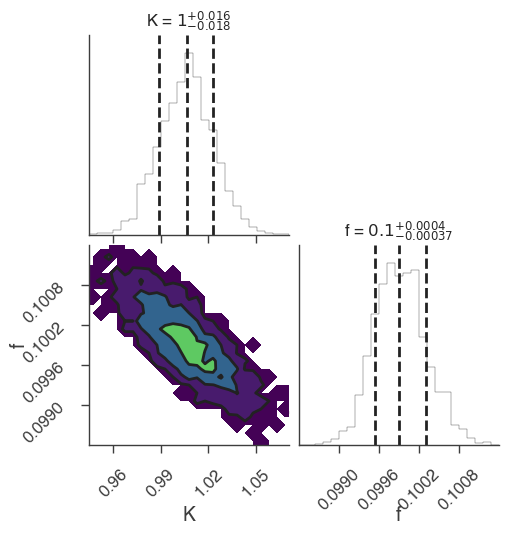

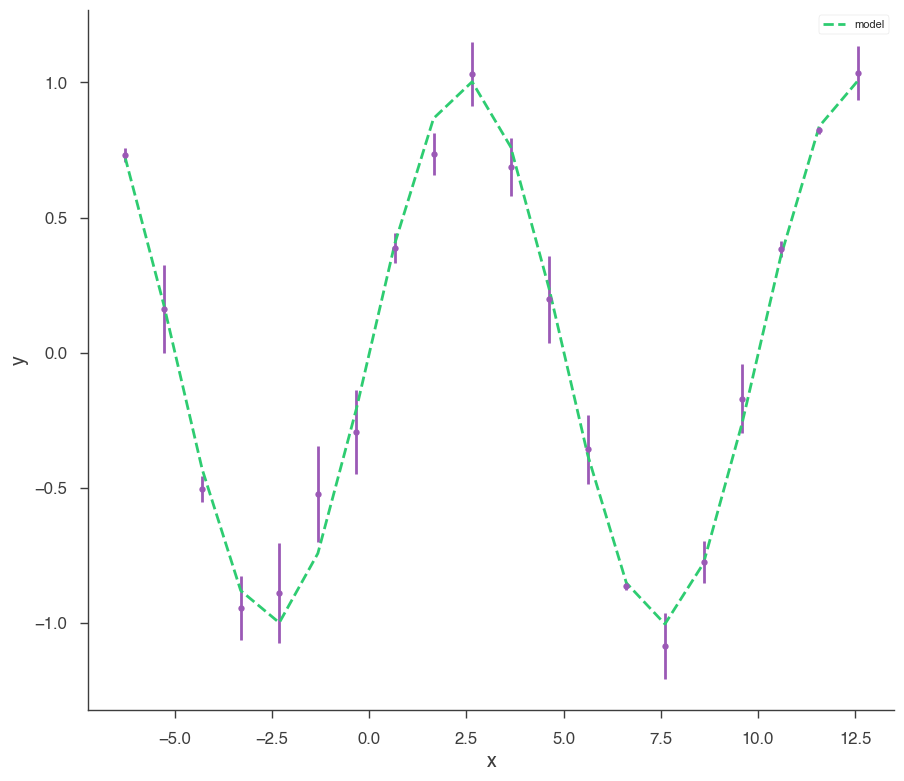

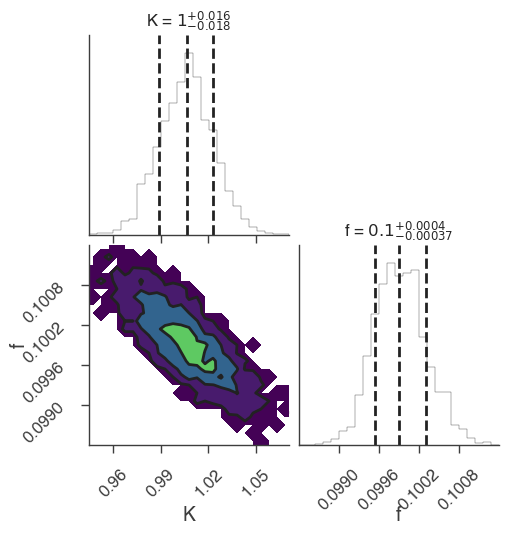

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

19:04:07 INFO      sampler set to dynesty_dynamic                                          ]8;id=71289;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=487643;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

124it [00:00, 1235.92it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 137 | eff(%): 19.466 | loglstar:   -inf < -12709.607 <    inf | logz: -12716.763 +/-  0.120 | dlogz: 12717.185 >  0.010]

341it [00:00, 1784.25it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 468 | eff(%): 35.227 | loglstar:   -inf < -7936.196 <    inf | logz: -7943.785 +/-  0.123 | dlogz: 7968.712 >  0.010]   

520it [00:00, 1745.93it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 881 | eff(%): 37.654 | loglstar:   -inf < -6108.575 <    inf | logz: -6116.519 +/-  0.126 | dlogz: 6112.876 >  0.010]

695it [00:00, 1579.40it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1458 | eff(%): 35.495 | loglstar:   -inf < -4562.784 <    inf | logz: -4571.080 +/-  0.129 | dlogz: 4570.433 >  0.010]

855it [00:00, 1263.20it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 2096 | eff(%): 32.935 | loglstar:   -inf < -3456.420 <    inf | logz: -3465.035 +/-  0.131 | dlogz: 3462.607 >  0.010]

990it [00:00, 1059.05it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 2907 | eff(%): 29.058 | loglstar:   -inf < -2643.061 <    inf | logz: -2651.345 +/-  0.122 | dlogz: 2641.521 >  0.010]

1105it [00:00, 1000.88it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3661 | eff(%): 26.556 | loglstar:   -inf < -2241.542 <    inf | logz: -2250.658 +/-  0.135 | dlogz: 2268.448 >  0.010]

1211it [00:01, 916.35it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 4722 | eff(%): 23.190 | loglstar:   -inf < -1708.063 <    inf | logz: -1717.314 +/-  0.134 | dlogz: 1708.889 >  0.010]

1307it [00:01, 845.19it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 5705 | eff(%): 21.064 | loglstar:   -inf < -1425.168 <    inf | logz: -1434.546 +/-  0.134 | dlogz: 1425.666 >  0.010]

1394it [00:01, 729.95it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 6842 | eff(%): 18.987 | loglstar:   -inf < -1232.498 <    inf | logz: -1241.426 +/-  0.131 | dlogz: 1230.989 >  0.010] 

1470it [00:01, 696.46it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 7813 | eff(%): 17.683 | loglstar:   -inf < -1113.879 <    inf | logz: -1122.667 +/-  0.129 | dlogz: 1111.716 >  0.010]

1542it [00:01, 573.53it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 9073 | eff(%): 16.108 | loglstar:   -inf < -1021.688 <    inf | logz: -1031.083 +/-  0.130 | dlogz: 1020.131 >  0.010]

1603it [00:01, 506.61it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 10391 | eff(%): 14.719 | loglstar:   -inf < -946.741 <    inf | logz: -956.087 +/-  0.131 | dlogz: 944.924 >  0.010]  

1657it [00:02, 427.21it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 11712 | eff(%): 13.569 | loglstar:   -inf < -887.708 <    inf | logz: -897.325 +/-  0.135 | dlogz: 888.183 >  0.010]

1703it [00:02, 378.37it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 13016 | eff(%): 12.600 | loglstar:   -inf < -787.621 <    inf | logz: -797.931 +/-  0.144 | dlogz: 799.558 >  0.010]

1743it [00:02, 346.06it/s, batch: 0 | bound: 0 | nc: 65 | ncall: 14227 | eff(%): 11.835 | loglstar:   -inf < -738.257 <    inf | logz: -747.168 +/-  0.127 | dlogz: 736.868 >  0.010]

1779it [00:02, 323.76it/s, batch: 0 | bound: 0 | nc: 50 | ncall: 15192 | eff(%): 11.337 | loglstar:   -inf < -682.515 <    inf | logz: -692.249 +/-  0.134 | dlogz: 682.563 >  0.010]

1812it [00:02, 294.30it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 16317 | eff(%): 10.775 | loglstar:   -inf < -633.075 <    inf | logz: -643.124 +/-  0.136 | dlogz: 633.505 >  0.010]

1842it [00:02, 267.00it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 17435 | eff(%): 10.270 | loglstar:   -inf < -600.671 <    inf | logz: -609.409 +/-  0.129 | dlogz: 598.865 >  0.010]

1869it [00:03, 211.94it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 18156 | eff(%): 10.018 | loglstar:   -inf < -568.973 <    inf | logz: -578.645 +/-  0.134 | dlogz: 568.537 >  0.010] 

1945it [00:03, 320.43it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18283 | eff(%): 10.355 | loglstar:   -inf < -474.939 <    inf | logz: -484.527 +/-  0.133 | dlogz: 473.995 >  0.010]

2104it [00:03, 600.30it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18658 | eff(%): 10.982 | loglstar:   -inf < -330.452 <    inf | logz: -339.868 +/-  0.133 | dlogz: 328.811 >  0.010]

2182it [00:03, 523.23it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18893 | eff(%): 11.251 | loglstar:   -inf < -276.869 <    inf | logz: -286.335 +/-  0.133 | dlogz: 275.114 >  0.010]

2247it [00:03, 486.17it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19015 | eff(%): 11.514 | loglstar:   -inf < -241.513 <    inf | logz: -251.026 +/-  0.132 | dlogz: 239.605 >  0.010]

2434it [00:03, 783.63it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19429 | eff(%): 12.213 | loglstar:   -inf < -173.056 <    inf | logz: -182.692 +/-  0.132 | dlogz: 171.486 >  0.010]

2530it [00:03, 671.66it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19670 | eff(%): 12.543 | loglstar:   -inf < -148.985 <    inf | logz: -158.609 +/-  0.131 | dlogz: 147.154 >  0.010]

2728it [00:03, 950.85it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 20004 | eff(%): 13.305 | loglstar:   -inf < -109.010 <    inf | logz: -118.437 +/-  0.132 | dlogz: 106.697 >  0.010]

2876it [00:04, 806.63it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20394 | eff(%): 13.765 | loglstar:   -inf < -79.971 <    inf | logz: -90.118 +/-  0.135 | dlogz: 78.137 >  0.010]   

3095it [00:04, 1083.98it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20740 | eff(%): 14.572 | loglstar:   -inf < -55.617 <    inf | logz: -65.766 +/-  0.135 | dlogz: 53.335 >  0.010]

3231it [00:04, 1114.74it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 21087 | eff(%): 14.967 | loglstar:   -inf < -43.553 <    inf | logz: -53.705 +/-  0.135 | dlogz: 41.199 >  0.010]

3363it [00:04, 891.48it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21298 | eff(%): 15.428 | loglstar:   -inf < -35.513 <    inf | logz: -45.521 +/-  0.135 | dlogz: 32.724 >  0.010] 

3554it [00:04, 1100.35it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21641 | eff(%): 16.052 | loglstar:   -inf < -26.918 <    inf | logz: -36.962 +/-  0.135 | dlogz: 23.767 >  0.010]

3688it [00:05, 877.11it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21929 | eff(%): 16.443 | loglstar:   -inf < -22.597 <    inf | logz: -32.518 +/-  0.134 | dlogz: 19.042 >  0.010] 

3882it [00:05, 1086.48it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22194 | eff(%): 17.106 | loglstar:   -inf < -17.585 <    inf | logz: -27.701 +/-  0.135 | dlogz: 13.833 >  0.010]

4055it [00:05, 1225.71it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 22519 | eff(%): 17.616 | loglstar:   -inf < -14.411 <    inf | logz: -24.519 +/-  0.135 | dlogz: 10.308 >  0.010]

4202it [00:05, 941.50it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22768 | eff(%): 18.059 | loglstar:   -inf < -12.242 <    inf | logz: -22.524 +/-  0.136 | dlogz:  8.018 >  0.010] 

4374it [00:05, 1097.13it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 23054 | eff(%): 18.570 | loglstar:   -inf < -10.389 <    inf | logz: -20.651 +/-  0.136 | dlogz:  5.800 >  0.010]

4510it [00:05, 1150.37it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23378 | eff(%): 18.888 | loglstar:   -inf < -9.433 <    inf | logz: -19.603 +/-  0.136 | dlogz:  4.486 >  0.010] 

4645it [00:05, 962.41it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23556 | eff(%): 19.309 | loglstar:   -inf < -8.687 <    inf | logz: -18.849 +/-  0.136 | dlogz:  3.490 >  0.010] 

4866it [00:05, 1231.66it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23909 | eff(%): 19.935 | loglstar:   -inf < -7.751 <    inf | logz: -17.959 +/-  0.136 | dlogz:  2.258 >  0.010]

5013it [00:06, 980.98it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24210 | eff(%): 20.287 | loglstar:   -inf < -7.306 <    inf | logz: -17.542 +/-  0.136 | dlogz:  1.650 >  0.010] 

5213it [00:06, 1188.03it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24498 | eff(%): 20.854 | loglstar:   -inf < -6.903 <    inf | logz: -17.132 +/-  0.136 | dlogz:  1.055 >  0.010]

5369it [00:06, 1271.05it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24812 | eff(%): 21.211 | loglstar:   -inf < -6.686 <    inf | logz: -16.909 +/-  0.136 | dlogz:  0.740 >  0.010]

5517it [00:06, 988.77it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25028 | eff(%): 21.612 | loglstar:   -inf < -6.549 <    inf | logz: -16.756 +/-  0.136 | dlogz:  0.530 >  0.010]

5738it [00:06, 1240.97it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25373 | eff(%): 22.178 | loglstar:   -inf < -6.385 <    inf | logz: -16.599 +/-  0.136 | dlogz:  0.325 >  0.010]

5890it [00:06, 1012.53it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25687 | eff(%): 22.492 | loglstar:   -inf < -6.309 <    inf | logz: -16.524 +/-  0.136 | dlogz:  0.234 >  0.010]

6066it [00:07, 1162.78it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25930 | eff(%): 22.951 | loglstar:   -inf < -6.239 <    inf | logz: -16.461 +/-  0.136 | dlogz:  0.160 >  0.010]

6227it [00:07, 1261.33it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 26231 | eff(%): 23.295 | loglstar:   -inf < -6.203 <    inf | logz: -16.420 +/-  0.136 | dlogz:  0.114 >  0.010]

6374it [00:07, 1061.91it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26485 | eff(%): 23.621 | loglstar:   -inf < -6.171 <    inf | logz: -16.392 +/-  0.136 | dlogz:  0.084 >  0.010]

6556it [00:07, 1226.98it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26783 | eff(%): 24.030 | loglstar:   -inf < -6.146 <    inf | logz: -16.367 +/-  0.136 | dlogz:  0.058 >  0.010]

6717it [00:07, 1317.34it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 27107 | eff(%): 24.331 | loglstar:   -inf < -6.131 <    inf | logz: -16.352 +/-  0.136 | dlogz:  0.042 >  0.010]

6865it [00:07, 1103.05it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27319 | eff(%): 24.677 | loglstar:   -inf < -6.121 <    inf | logz: -16.341 +/-  0.136 | dlogz:  0.031 >  0.010]

7057it [00:07, 1288.00it/s, batch: 0 | bound: 13 | nc: 12 | ncall: 27665 | eff(%): 25.056 | loglstar:   -inf < -6.112 <    inf | logz: -16.332 +/-  0.136 | dlogz:  0.021 >  0.010]

7204it [00:08, 1081.76it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27970 | eff(%): 25.304 | loglstar:   -inf < -6.106 <    inf | logz: -16.326 +/-  0.136 | dlogz:  0.016 >  0.010] 

7409it [00:08, 1295.44it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28265 | eff(%): 25.757 | loglstar:   -inf < -6.101 <    inf | logz: -16.321 +/-  0.136 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7922it [00:08, 842.92it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 28781 | eff(%): 27.525 | loglstar: -7.908 < -7.038 < -6.604 | logz: -16.311 +/-  0.140 | stop:  1.369]            

8130it [00:09, 985.60it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 29056 | eff(%): 27.486 | loglstar: -7.908 < -7.306 < -6.604 | logz: -16.311 +/-  0.140 | stop:  1.369]

8308it [00:09, 1097.86it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 29416 | eff(%): 27.750 | loglstar: -7.908 < -6.921 < -6.604 | logz: -16.311 +/-  0.140 | stop:  1.369]

8466it [00:09, 964.34it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29664 | eff(%): 28.045 | loglstar: -7.908 < -6.710 < -6.604 | logz: -16.311 +/-  0.140 | stop:  1.369] 

8899it [00:09, 1516.84it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 30163 | eff(%): 29.337 | loglstar: -7.908 < -6.261 < -6.604 | logz: -16.311 +/-  0.140 | stop:  1.369]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9121it [00:10, 640.64it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30401 | eff(%): 29.502 | loglstar: -8.426 < -8.200 < -7.907 | logz: -16.313 +/-  0.115 | stop:  1.066] 

9628it [00:10, 1062.81it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 30944 | eff(%): 31.043 | loglstar: -8.426 < -6.384 < -7.907 | logz: -16.313 +/-  0.115 | stop:  1.066]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9698it [00:11, 875.97it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 31015 | eff(%): 31.269 | loglstar: -8.426 < -6.098 < -7.907 | logz: -16.313 +/-  0.115 | stop:  0.926] 

19:04:18 INFO      fit restored to maximum of posterior                                         ]8;id=682473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=568308;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=513957;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=995677;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 +/- 0.018,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.099017
total,-6.099017


Values of statistical measures:

,statistical measures
AIC,16.903916
BIC,18.189498
DIC,16.237156
PDIC,2.017243
log(Z),-7.086501


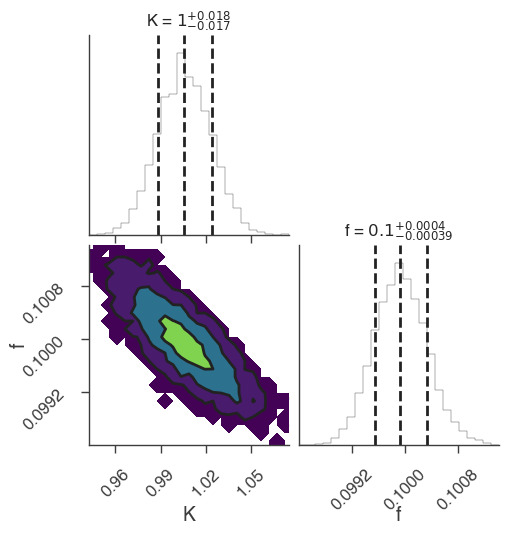

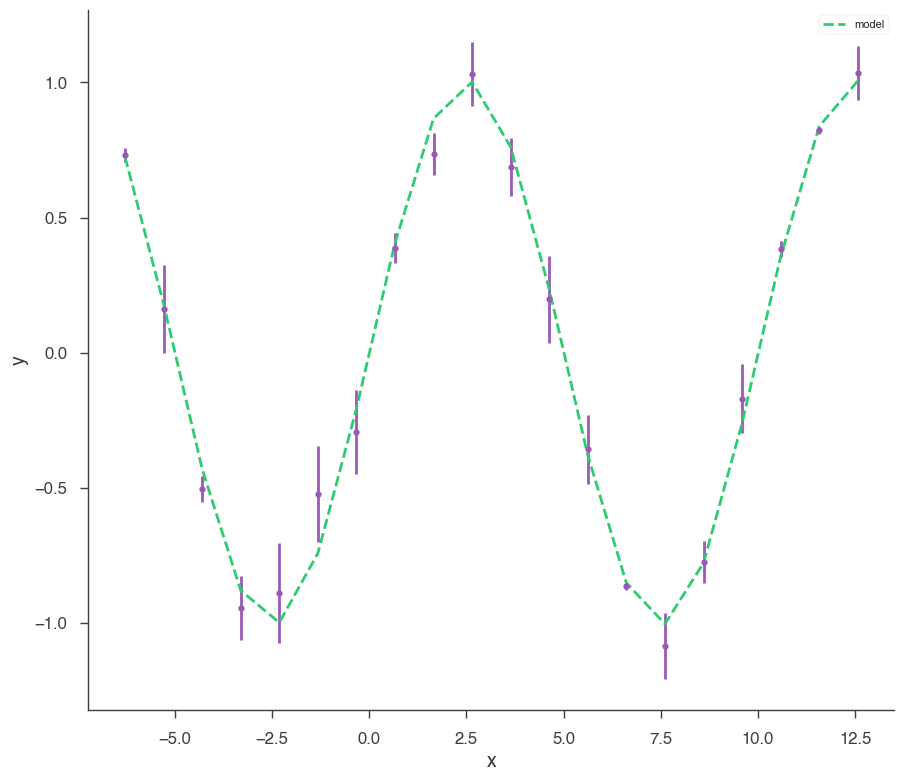

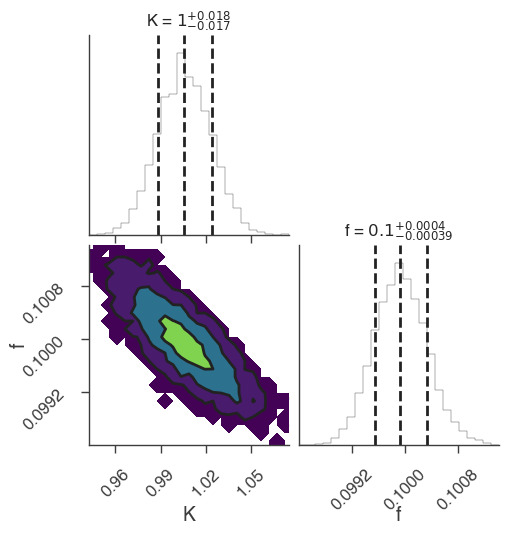

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

19:04:19 INFO      sampler set to zeus                                                     ]8;id=454279;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=550722;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 46.51it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:15, 40.06it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:14, 42.04it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:12, 47.06it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:11, 53.52it/s]

Sampling progress :   6%|▌         | 35/625 [00:00<00:10, 57.44it/s]

Sampling progress :   7%|▋         | 41/625 [00:00<00:10, 58.12it/s]

Sampling progress :   8%|▊         | 47/625 [00:00<00:09, 58.59it/s]

Sampling progress :   9%|▊         | 54/625 [00:00<00:09, 61.04it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:08, 63.44it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:09, 61.49it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:08, 61.63it/s]

Sampling progress :  13%|█▎        | 83/625 [00:01<00:08, 65.04it/s]

Sampling progress :  14%|█▍        | 90/625 [00:01<00:08, 64.07it/s]

Sampling progress :  16%|█▌        | 97/625 [00:01<00:09, 57.90it/s]

Sampling progress :  16%|█▋        | 103/625 [00:01<00:08, 58.14it/s]

Sampling progress :  18%|█▊        | 110/625 [00:01<00:08, 61.23it/s]

Sampling progress :  19%|█▉        | 118/625 [00:02<00:07, 65.03it/s]

Sampling progress :  20%|██        | 125/625 [00:02<00:07, 65.65it/s]

Sampling progress :  21%|██        | 132/625 [00:02<00:07, 66.88it/s]

Sampling progress :  23%|██▎       | 141/625 [00:02<00:06, 70.16it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:06, 70.46it/s]

Sampling progress :  25%|██▌       | 157/625 [00:02<00:06, 68.04it/s]

Sampling progress :  26%|██▌       | 164/625 [00:02<00:06, 65.92it/s]

Sampling progress :  27%|██▋       | 171/625 [00:02<00:06, 64.92it/s]

Sampling progress :  29%|██▊       | 179/625 [00:02<00:06, 68.29it/s]

Sampling progress :  30%|██▉       | 186/625 [00:03<00:06, 66.76it/s]

Sampling progress :  31%|███       | 193/625 [00:03<00:06, 67.09it/s]

Sampling progress :  32%|███▏      | 200/625 [00:03<00:06, 66.56it/s]

Sampling progress :  33%|███▎      | 207/625 [00:03<00:06, 61.87it/s]

Sampling progress :  34%|███▍      | 214/625 [00:03<00:06, 61.94it/s]

Sampling progress :  35%|███▌      | 221/625 [00:03<00:06, 62.05it/s]

Sampling progress :  36%|███▋      | 228/625 [00:03<00:06, 63.98it/s]

Sampling progress :  38%|███▊      | 237/625 [00:03<00:05, 69.11it/s]

Sampling progress :  39%|███▉      | 244/625 [00:03<00:05, 68.51it/s]

Sampling progress :  40%|████      | 252/625 [00:04<00:05, 68.93it/s]

Sampling progress :  41%|████▏     | 259/625 [00:04<00:05, 67.02it/s]

Sampling progress :  43%|████▎     | 266/625 [00:04<00:05, 63.91it/s]

Sampling progress :  44%|████▎     | 273/625 [00:04<00:05, 63.99it/s]

Sampling progress :  45%|████▍     | 281/625 [00:04<00:05, 65.03it/s]

Sampling progress :  46%|████▌     | 289/625 [00:04<00:05, 66.99it/s]

Sampling progress :  47%|████▋     | 296/625 [00:04<00:05, 65.77it/s]

Sampling progress :  48%|████▊     | 303/625 [00:04<00:04, 65.53it/s]

Sampling progress :  50%|████▉     | 311/625 [00:04<00:04, 68.67it/s]

Sampling progress :  51%|█████     | 318/625 [00:05<00:04, 65.88it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:05<00:04, 64.16it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:05<00:04, 63.57it/s]

Sampling progress :  54%|█████▍    | 339/625 [00:05<00:04, 64.67it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:05<00:04, 63.91it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:05<00:04, 59.53it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:05<00:04, 59.20it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:05<00:04, 61.52it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:05<00:03, 62.92it/s]

Sampling progress :  61%|██████    | 381/625 [00:06<00:03, 62.85it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:06<00:03, 60.43it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:06<00:03, 62.38it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:06<00:03, 61.78it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:06<00:03, 65.31it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:06<00:02, 69.84it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:06<00:02, 72.09it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:06<00:02, 71.02it/s]

Sampling progress :  71%|███████   | 443/625 [00:06<00:02, 71.20it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:07<00:02, 72.28it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:07<00:02, 72.52it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:07<00:02, 67.79it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:07<00:02, 66.91it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:07<00:02, 64.34it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:07<00:02, 61.53it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:07<00:02, 62.25it/s]

Sampling progress :  80%|████████  | 502/625 [00:07<00:01, 62.72it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:07<00:01, 64.37it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:08<00:01, 65.70it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:08<00:01, 69.75it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:08<00:01, 68.82it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:08<00:01, 69.32it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:08<00:01, 67.38it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:08<00:01, 66.64it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:08<00:00, 68.36it/s]

Sampling progress :  91%|█████████ | 569/625 [00:08<00:00, 67.05it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:08<00:00, 66.30it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:09<00:00, 66.13it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:09<00:00, 62.69it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:09<00:00, 61.98it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:09<00:00, 65.35it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:09<00:00, 64.61it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:09<00:00, 68.36it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 64.41it/s]

19:04:29 INFO      fit restored to maximum of posterior                                         ]8;id=731324;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=561655;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=448718;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=744036;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 23


Scale Factor: 0.974293


Mean Integrated Autocorrelation Time: 3.01


Effective Sample Size: 4153.62


Number of Log Probability Evaluations: 67271


Effective Samples per Log Probability Evaluation: 0.061745


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.018 +0.017,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.099139
total,-6.099139


Values of statistical measures:

,statistical measures
AIC,16.904161
BIC,18.189743
DIC,16.146087
PDIC,1.971895


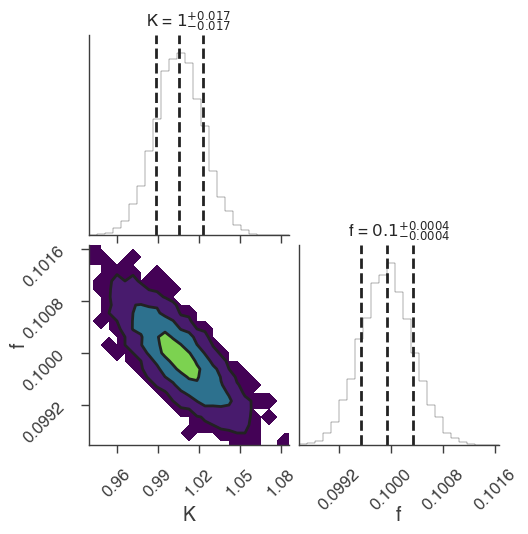

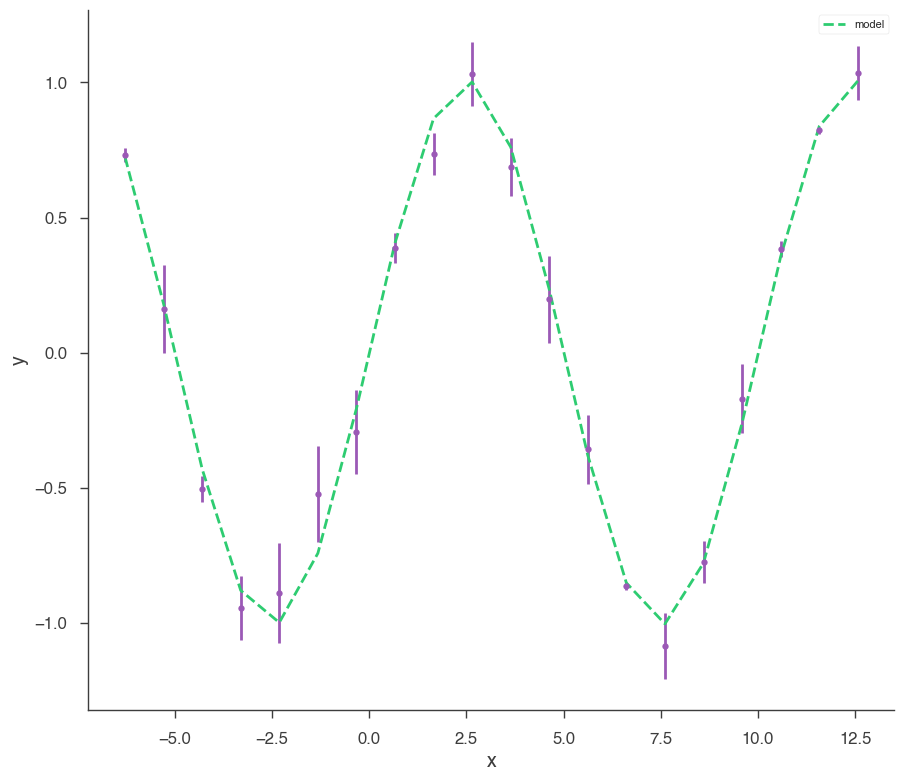

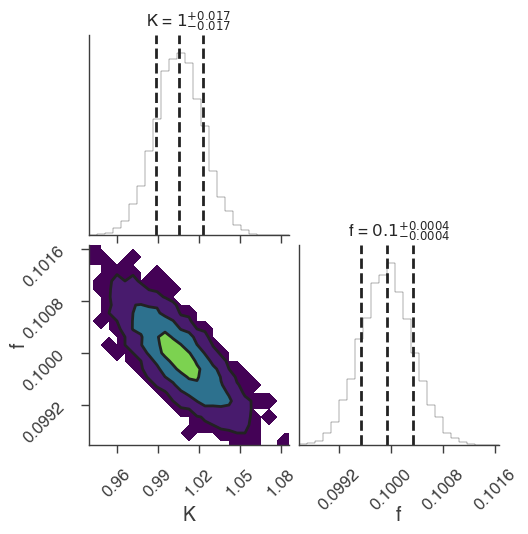

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

19:04:30 INFO      sampler set to ultranest                                                ]8;id=985826;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=149861;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  


[ultranest] Likelihood function evaluations: 11345


[ultranest]   logZ = -16.04 +- 0.116


[ultranest] Effective samples strategy satisfied (ESS = 984.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


19:04:39 INFO      fit restored to maximum of posterior                                         ]8;id=859425;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=195465;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=364687;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=187987;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.017 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.991 -0.035 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.099083
total,-6.099083


Values of statistical measures:

,statistical measures
AIC,16.904049
BIC,18.189631
DIC,16.149637
PDIC,1.970692
log(Z),-6.959522


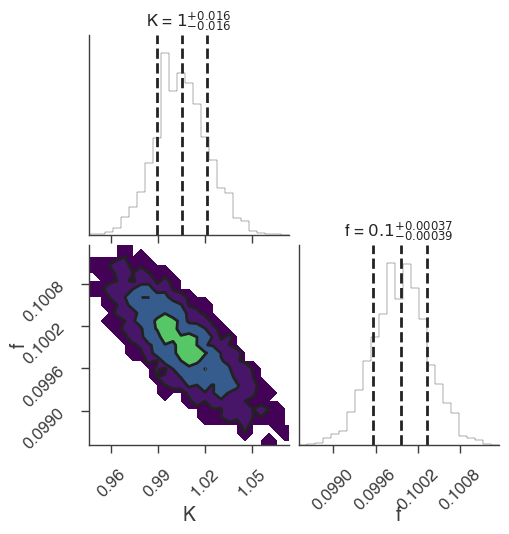

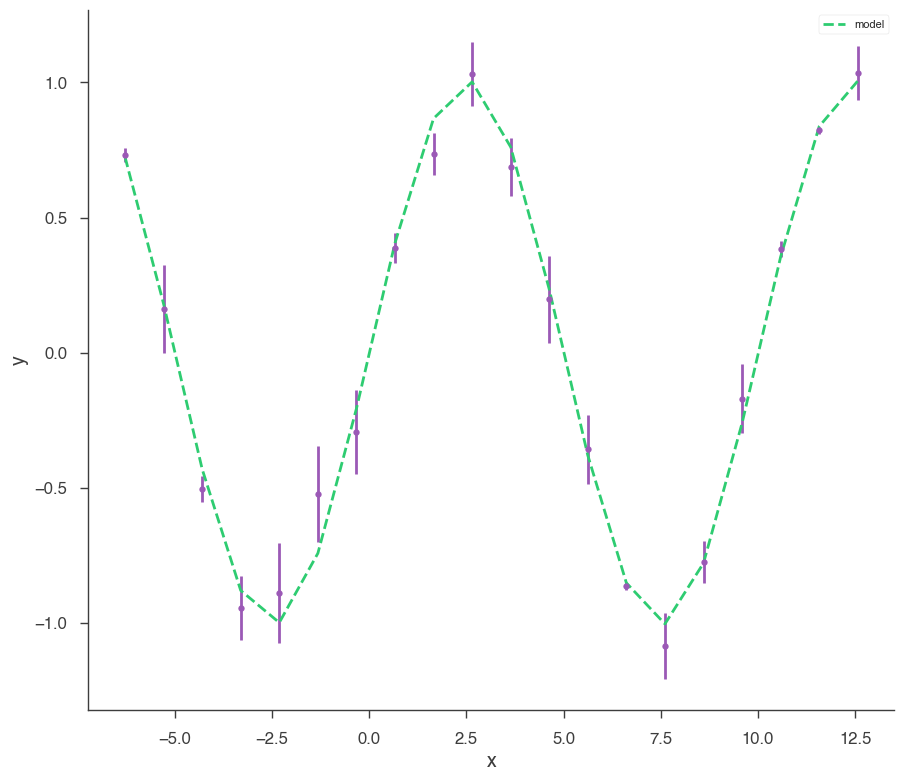

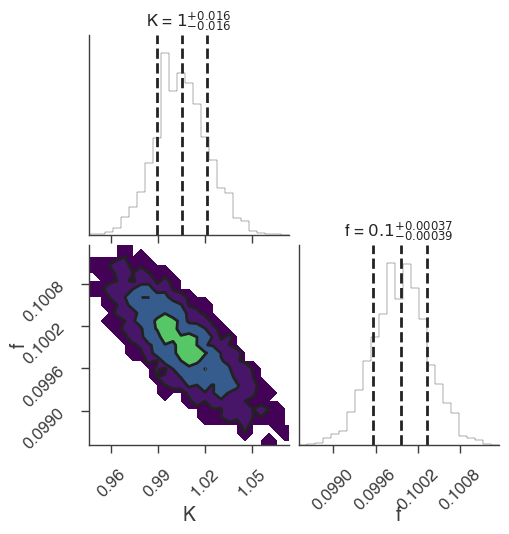

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()